https://www.kaggle.com/code/launay10christian/world-cup-prediction/notebook

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
world_cup = pd.read_csv('wc2020.csv')

In [4]:
results = pd.read_csv('results.csv')

In [5]:
world_cup.head()

,Team,Group,Previous \ntitles,Previous\n finals,Previous semifinals,Current FIFA Rank,First match \nagainst,Match index,History with first Opponent,Second match\n against,match index.2,History with second Opponent,Third match\n against,match index.3,History with third Opponent
0,Ecuador,A,0,0,0,46,Qatar,1,0,Netherlands,17,-1.0,Senegal,33,-1.0
1,Netherlands,A,0,3,5,10,Senegal,2,NaN,Ecuador,17,1.0,Qatar,34,NaN
2,Qatar,A,0,0,0,51,Ecuador,1,0,Senegal,18,NaN,Netherlands,34,NaN
3,Senegal,A,0,0,0,20,Netherlands,2,n.a,Qatar,18,NaN,Ecuador,33,1.0
4,England,B,1,1,3,5,Iran,3,NaN,USA,19,6.0,Wales,35,54.0


In [6]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home_wins
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,T
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,W
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,W
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,T
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,W


In [7]:
#Adding goal difference and establishing who is the winner 
winner = []
for i in range (len(results['home_team'])):
    if results ['home_score'][i] > results['away_score'][i]:
        winner.append(results['home_team'][i])
    elif results['home_score'][i] < results ['away_score'][i]:
        winner.append(results['away_team'][i])
    else:
        winner.append('Draw')
results['winning_team'] = winner

#adding goal difference column
results['goal_difference'] = np.absolute(results['home_score'] - results['away_score'])

results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home_wins,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,T,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,W,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1,W,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,T,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,W,Scotland,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39649,2018-06-27,Switzerland,Costa Rica,2,2,FIFA World Cup,Nizhny Novgorod,Russia,True,0,T,Draw,0
39650,2018-06-28,Japan,Poland,0,1,FIFA World Cup,Volgograd,Russia,True,-1,L,Poland,1
39651,2018-06-28,Senegal,Colombia,0,1,FIFA World Cup,Samara,Russia,True,-1,L,Colombia,1
39652,2018-06-28,Panama,Tunisia,1,2,FIFA World Cup,Saransk,Russia,True,-1,L,Tunisia,1


In [8]:
df = results[(results['home_team'] == 'France') | (results['away_team'] == 'France')]
france = df.iloc[:]
france.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home_wins,winning_team,goal_difference
160,2004-05-01,Belgium,France,3,3,Friendly,Brussels,Belgium,False,0,T,Draw,0
162,2005-02-12,France,Switzerland,1,0,Friendly,Paris,France,False,1,W,France,1
171,2005-05-07,Belgium,France,7,0,Friendly,Brussels,Belgium,False,7,W,Belgium,7
181,2006-04-22,France,Belgium,0,5,Friendly,Saint-Cloud,France,False,-5,L,Belgium,5
196,2007-04-21,Belgium,France,1,2,Friendly,Brussels,Belgium,False,-1,L,France,1


In [9]:
#creating a column for year and the first world cup was held in 1930
year = []
for row in france['date']:
    year.append(int(row[:4]))
france ['match_year']= year
france_1930 = france[france.match_year >= 1930]
france_1930.count()

date               816
home_team          816
away_team          816
home_score         816
away_score         816
tournament         816
city               816
country            816
neutral            816
home-away          816
home_wins          816
winning_team       816
goal_difference    816
match_year         816
dtype: int64

<AxesSubplot:xlabel='France_Results', ylabel='count'>

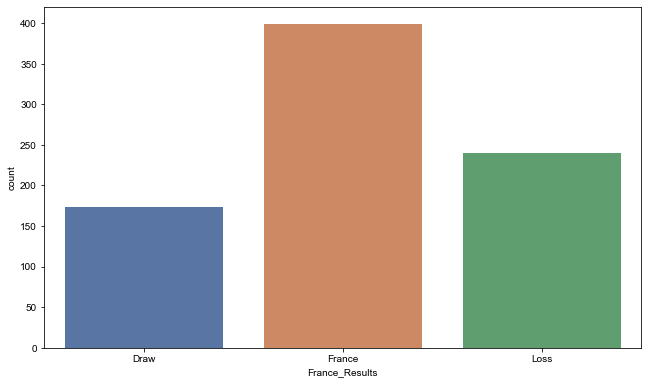

In [10]:
#what is the common game outcome for nigeria visualisation
wins = []
for row in france_1930['winning_team']:
    if row != 'France' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=[ 'France_Results'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='France_Results', data=winsdf)

In [11]:
#narrowing to team patcipating in the world cup
worldcup_teams = ['Australia', 'Cameroon', 'Canada', 
            'Ecuador', 'Ghana', ' Iran', 'Japan', 
            'Korea Republic', 'Saudi Arabia', 'Mexico', 
            'Netherlands', 'Qatar', 'USA', 'Wales', 
            'Morocco', 'Senegal', 'Tunisia', 'Costa Rica', 
            'Argentina', 'Brazil', 'Uruguay', 'Belgium', 
            'Croatia', 'Denmark', 'England', 'France', 
            'Germany', 'Poland', 'Portugal', 'Serbia', 
            'Spain', 'Sweden', 'Switzerland']
df_teams_home = results[results['home_team'].isin(worldcup_teams)]
df_teams_away = results[results['away_team'].isin(worldcup_teams)]
df_teams = pd.concat((df_teams_home, df_teams_away))
df_teams.drop_duplicates()
df_teams.count()

date               21475
home_team          21475
away_team          21475
home_score         21475
away_score         21475
tournament         21475
city               21475
country            21475
neutral            21475
home-away          21475
home_wins          21475
winning_team       21475
goal_difference    21475
dtype: int64

In [13]:
df_teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home_wins,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,2,W,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,0,T,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,-2,L,Scotland,2
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,-2,L,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,London,England,False,1,W,England,1


In [14]:
#create an year column to drop games before 1930
year = []
for row in df_teams['date']:
    year.append(int(row[:4]))
df_teams['match_year'] = year
df_teams_1930 = df_teams[df_teams.match_year >= 1930]
df_teams_1930.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home-away,home_wins,winning_team,goal_difference,match_year
127,2000-02-24,Wales,Northern Ireland,2,0,British Championship,Llandudno,Wales,False,2,W,Wales,2,2000
130,2000-03-26,Wales,England,1,1,British Championship,Cardiff,Wales,False,0,T,Draw,0,2000
133,2001-03-02,Wales,Scotland,1,1,British Championship,Wrexham,Wales,False,0,T,Draw,0,2001
134,2001-03-09,England,Northern Ireland,3,0,British Championship,Southampton,England,False,3,W,England,3,2001
135,2001-03-18,England,Wales,6,0,British Championship,Newcastle,England,False,6,W,England,6,2001


In [15]:
#dropping columns that wll not affect matchoutcomes
df_teams_1930 = df_teams.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country', 'goal_difference', 'match_year'], axis=1)
df_teams_1930.head()

,home_team,away_team,neutral,home-away,home_wins,winning_team
1,England,Scotland,False,2,W,England
3,England,Scotland,False,0,T,Draw
6,England,Scotland,False,-2,L,Scotland
7,Wales,Scotland,False,-2,L,Scotland
10,England,Wales,False,1,W,England


In [16]:
#Building the model
#the prediction label: The winning_team column will show "2" if the home team has won, "1" if it was a tie, and "0" if the away team has won.

df_teams_1930 = df_teams_1930.reset_index(drop=True)
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.home_team,'winning_team']=2
df_teams_1930.loc[df_teams_1930.winning_team == 'Draw', 'winning_team']=1
df_teams_1930.loc[df_teams_1930.winning_team == df_teams_1930.away_team, 'winning_team']=0

df_teams_1930.head()

,home_team,away_team,neutral,home-away,home_wins,winning_team
0,England,Scotland,False,2,W,2
1,England,Scotland,False,0,T,1
2,England,Scotland,False,-2,L,0
3,Wales,Scotland,False,-2,L,0
4,England,Wales,False,1,W,2


In [17]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(df_teams_1930, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [18]:
final.head()

,neutral,home-away,home_wins,winning_team,home_team_Afghanistan,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Antigua and Barbuda,...,away_team_Venezuela,away_team_Vietnam,away_team_Vietnam Republic,away_team_Wales,away_team_Western Australia,away_team_Yemen,away_team_Yemen DPR,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,False,2,W,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,0,T,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,-2,L,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,-2,L,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,1,W,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [20]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

ValueError: could not convert string to float: 'L'